<a href="https://colab.research.google.com/github/carlosdgerez/machine_learning/blob/main/starter_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the 2 sets. one for the model, and the second for final testing. 

import pandas as pd

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
last_campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test.csv')

In [ ]:
# Looking to the data
last_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  campaign        4119 non-null   int64  
 11  pdays           4119 non-null   int64  
 12  previous        4119 non-null   int64  
 13  poutcome        4119 non-null   object 
 14  emp.var.rate    4119 non-null   float64
 15  cons.price.idx  4119 non-null   float64
 16  cons.conf.idx   4119 non-null   float64
 17  euribor3m       4119 non-null   f

In [ ]:
# Unique values for month are just 10 (not jan or feb)
campaign.head(7)
campaign.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [ ]:
# Looking to the dataset
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [ ]:
campaign.day_of_week.unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [ ]:
# looking to the distribution of the campaign in terms of last contacted (lots of 999) Its very unbalanced
last_contact = pd.DataFrame(campaign.pdays.value_counts())

In [ ]:
last_contact.reset_index(inplace=True)

In [ ]:
last_contact

index  pdays
0     999  39673
1       3    439
2       6    412
3       4    118
4       9     64
5       2     61
6       7     60
7      12     58
8      10     52
9       5     46
10     13     36
11     11     28
12      1     26
13     15     24
14     14     20
15      8     18
16      0     15
17     16     11
18     17      8
19     18      7
20     22      3
21     19      3
22     21      2
23     25      1
24     26      1
25     27      1
26     20      1

In [ ]:
import altair as alt
alt.Chart(last_contact).mark_bar(
    
).encode(
    x=alt.X('index', bin=False, title='Day', scale=alt.Scale(zero=False)),
   y = alt.Y('pdays', title = 'Registers', scale=alt.Scale(zero=True)),
    tooltip = ['pdays', 'count(pdays)']
).properties(
    width=700,
    height = 700,
    title='Unbalace of the dataset '
)

alt.Chart(...)

In [ ]:
# Looking to the poutcome and see what this field means. The number of nonexistent its very similar to the counts of 999 in the pdays.
campaign.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [ ]:
campaign.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [ ]:
campaign.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [ ]:
# most of the contacted are in the tail of the set (pdays values with less values)
campaign.tail(1000)

age          job  marital            education default housing loan  \
40188   59   technician  married  professional.course      no     yes   no   
40189   21    housemaid   single          high.school      no      no   no   
40190   54       admin.  married    university.degree      no      no  yes   
40191   22       admin.   single    university.degree      no     yes   no   
40192   56   technician  married  professional.course      no     yes   no   
...    ...          ...      ...                  ...     ...     ...  ...   
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

         contact month day_of_week  campaign  pdays  previous     poutcome  \
40188   cellular   jul         fri         2     15         1      success   
40189   cellular   jul         fri         2    999         0  nonexistent   
40190   cellular   jul         fri         5    999         2      failure   
40191  telephone   jul         mon         1    999         2      failure   
40192   cellular   jul         mon         2     13         1      success   
...          ...   ...         ...       ...    ...       ...          ...   
41183   cellular   nov         fri         1    999         0  nonexistent   
41184   cellular   nov         fri         1    999         0  nonexistent   
41185   cellular   nov         fri         2    999         0  nonexistent   
41186   cellular   nov         fri         1    999         0  nonexistent   
41187   cellular   nov         fri         3    999         1      failure   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
40188          -1.7          94.215          -40.3      0.861       4991.6   
40189          -1.7          94.215          -40.3      0.861       4991.6   
40190          -1.7          94.215          -40.3      0.861       4991.6   
40191          -1.7          94.215          -40.3      0.870       4991.6   
40192          -1.7          94.215          -40.3      0.870       4991.6   
...             ...             ...            ...        ...          ...   
41183          -1.1          94.767          -50.8      1.028       4963.6   
41184          -1.1          94.767          -50.8      1.028       4963.6   
41185          -1.1          94.767          -50.8      1.028       4963.6   
41186          -1.1          94.767          -50.8      1.028       4963.6   
41187          -1.1          94.767          -50.8      1.028       4963.6   

         y  
40188  yes  
40189   no  
40190   no  
40191  yes  
40192  yes  
...    ...  
41183  yes  
41184   no  
41185   no  
41186  yes  
41187   no  

[1000 rows x 20 columns]

In [ ]:
#Analizing the week days results, are very good distribuited
campaign.day_of_week.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [ ]:
# Looking to education fields
campaign.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [ ]:
# first intent to graph days ( just the tail), can be switch to the head to see the differences

import altair as alt
alt.Chart(campaign.tail(5000)).mark_bar(
    
).encode(
    x=alt.X('y', bin=False, title='Day'),
    y=alt.Y('count(y)', title='Records'),
    tooltip = ['day_of_week', 'count(y)', 'y'],
    color = 'y'
).properties(
    width=300,
    title='Results by day (just the tail)'
).facet( 
  column='day_of_week')

alt.FacetChart(...)

In [ ]:
# slicing the data 
new_campaign = campaign[campaign.pdays < 999 ]


In [ ]:
new_campaign.head(700)

age            job   marital            education  default housing  \
24108   37         admin.   married    university.degree       no     yes   
24264   48     management   married    university.degree       no     yes   
24279   42     technician   married  professional.course  unknown     yes   
24397   50   entrepreneur   married    university.degree  unknown     yes   
24482   36  self-employed    single    university.degree       no     yes   
...    ...            ...       ...                  ...      ...     ...   
38804   26        student    single    university.degree       no      no   
38805   26    blue-collar    single          high.school       no     yes   
38806   29         admin.    single    university.degree       no      no   
38810   80        retired  divorced              unknown       no     yes   
38812   21        student    single    university.degree       no     yes   

      loan    contact month day_of_week  campaign  pdays  previous poutcome  \
24108   no  telephone   nov         wed         1      6         1  success   
24264   no   cellular   nov         mon         1      4         1  success   
24279   no   cellular   nov         mon         1      4         1  success   
24397   no   cellular   nov         mon         1      3         1  success   
24482   no   cellular   nov         mon         2      4         1  success   
...    ...        ...   ...         ...       ...    ...       ...      ...   
38804   no   cellular   nov         fri         1      7         1  success   
38805   no  telephone   nov         fri         2      3         1  success   
38806   no   cellular   nov         fri         1      3         2  success   
38810  yes   cellular   nov         fri         2      3         1  success   
38812   no   cellular   nov         fri         3      3         1  success   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
24108          -0.1          93.200          -42.0      4.286       5195.8   
24264          -0.1          93.200          -42.0      4.191       5195.8   
24279          -0.1          93.200          -42.0      4.191       5195.8   
24397          -0.1          93.200          -42.0      4.191       5195.8   
24482          -0.1          93.200          -42.0      4.191       5195.8   
...             ...             ...            ...        ...          ...   
38804          -3.4          92.649          -30.1      0.714       5017.5   
38805          -3.4          92.649          -30.1      0.714       5017.5   
38806          -3.4          92.649          -30.1      0.714       5017.5   
38810          -3.4          92.649          -30.1      0.714       5017.5   
38812          -3.4          92.649          -30.1      0.714       5017.5   

         y  
24108   no  
24264   no  
24279   no  
24397   no  
24482   no  
...    ...  
38804  yes  
38805  yes  
38806  yes  
38810  yes  
38812   no  

[700 rows x 20 columns]

In [ ]:
# from now I try to generate a basic data report. It needs more work in it but the basics of how to construct one are there.
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [ ]:
data_types = pd.DataFrame(
    campaign.dtypes,
    columns=['Data Type']
)


missing_data = pd.DataFrame(
    campaign.isnull().sum(),
    columns=['Missing Values']
)


unique_values = pd.DataFrame(
    columns=['Unique Values']
)
for row in list(campaign.columns.values):
    unique_values.loc[row] = [campaign[row].nunique()]

maximum_values = pd.DataFrame(
    columns=['Maximum Value']
)
for row in list(campaign.columns.values):
    maximum_values.loc[row] = [campaign[row].max()]



In [ ]:
# A first draft data report, needs to separate by kind of objects and aggregate the information for categorical or continous types.
dq_report = data_types.join(missing_data).join(unique_values).join(maximum_values)
dq_report

Data Type  Missing Values Unique Values Maximum Value
age                int64               0            78            98
job               object               0            12       unknown
marital           object               0             4       unknown
education         object               0             8       unknown
default           object               0             3           yes
housing           object               0             3           yes
loan              object               0             3           yes
contact           object               0             2     telephone
month             object               0            10           sep
day_of_week       object               0             5           wed
campaign           int64               0            42            56
pdays              int64               0            27           999
previous           int64               0             8             7
poutcome          object               0             3       success
emp.var.rate     float64               0            10           1.4
cons.price.idx   float64               0            26        94.767
cons.conf.idx    float64               0            26         -26.9
euribor3m        float64               0           316         5.045
nr.employed      float64               0            11        5228.1
y                 object               0             2           yes

In [ ]:
# slice of positive responses for marketing ( an account was created)
yes_days = campaign[campaign.y == 'yes']
yes_days.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4640 entries, 75 to 41186
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4640 non-null   int64  
 1   job             4640 non-null   object 
 2   marital         4640 non-null   object 
 3   education       4640 non-null   object 
 4   default         4640 non-null   object 
 5   housing         4640 non-null   object 
 6   loan            4640 non-null   object 
 7   contact         4640 non-null   object 
 8   month           4640 non-null   object 
 9   day_of_week     4640 non-null   object 
 10  campaign        4640 non-null   int64  
 11  pdays           4640 non-null   int64  
 12  previous        4640 non-null   int64  
 13  poutcome        4640 non-null   object 
 14  emp.var.rate    4640 non-null   float64
 15  cons.price.idx  4640 non-null   float64
 16  cons.conf.idx   4640 non-null   float64
 17  euribor3m       4640 non-null  

In [ ]:
# First charts of responses by day

import altair as alt
week_days_orderer = ['mon','tue', 'wed','thu','fri']
alt.Chart(yes_days).mark_bar().encode(
    x=alt.X('day_of_week', bin=False, sort = week_days_orderer, title='Day'),
    y=alt.Y('count(y)', title='Results'),
    tooltip = ['y'],
    color = 'y').properties(
    width=300,
    height = 200,
    title='Days of the week yes response')

alt.Chart(...)

In [ ]:
# generate a new dataframe group by month, day and responses (size is used to get the number of yes or no responses)
month_days_responses = pd.DataFrame(campaign.groupby(['month', 'day_of_week', 'y']).size()).reset_index()
month_days_responses.rename(columns = {0:'totals'}, inplace= True)
month_days_responses.month.unique()

array(['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'sep'], dtype=object)

In [ ]:
# Second chart , to much information dificult to see the patterns
month_names_in_order = ['jan', 'feb', 'mar', 'apr', 'may',
                        'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
week_days_orderer = ['mon','tue', 'wed','thu','fri']
alt.Chart(month_days_responses).mark_bar().encode(
    x=alt.X('day_of_week', bin=False, sort = week_days_orderer, title=''),
    y=alt.Y('totals', title='Results'),
    tooltip = ['y', 'totals'],
    color = 'y', 
    column = alt.Column('month', sort= month_names_in_order, title ='Responses vary by month and day of the week'))

alt.Chart(...)

In [ ]:
# new dataframe including the job column orderer by responses yes or no
# This will be the base for the comparative chart
segmented_responses = pd.DataFrame(campaign.groupby(['month', 'day_of_week','job', 'y']).size()).reset_index()
segmented_responses.rename(columns = {0:'totals'}, inplace= True)


In [ ]:
segmented_responses

month day_of_week           job    y  totals
0      apr         fri        admin.   no     128
1      apr         fri        admin.  yes      21
2      apr         fri   blue-collar   no     160
3      apr         fri   blue-collar  yes       6
4      apr         fri  entrepreneur   no      23
...    ...         ...           ...  ...     ...
1057   sep         wed    technician  yes       7
1058   sep         wed    unemployed   no       6
1059   sep         wed    unemployed  yes       6
1060   sep         wed       unknown   no       3
1061   sep         wed       unknown  yes       2

[1062 rows x 5 columns]

In [ ]:
# same problem as before to much information dificult to visualize
month_names_in_order = ['jan', 'feb', 'mar', 'apr', 'may',
                        'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
week_days_orderer = ['mon','tue', 'wed','thu','fri']
alt.Chart(segmented_responses).mark_bar().encode(
    x=alt.X('day_of_week', bin=False, sort = week_days_orderer, title=''),
    y=alt.Y('totals', title='Results'),
    tooltip = ['y', 'totals', 'month'],
    color = 'y', 
    column = alt.Column('job', title ='Responses vary by month and day of the week'))

alt.Chart(...)

In [ ]:
filtered_segment = segmented_responses[segmented_responses['y'] == 'yes']
filtered_segment

month day_of_week           job    y  totals
1      apr         fri        admin.  yes      21
3      apr         fri   blue-collar  yes       6
5      apr         fri  entrepreneur  yes       3
7      apr         fri     housemaid  yes       2
9      apr         fri    management  yes       4
...    ...         ...           ...  ...     ...
1053   sep         wed      services  yes       2
1055   sep         wed       student  yes       7
1057   sep         wed    technician  yes       7
1059   sep         wed    unemployed  yes       6
1061   sep         wed       unknown  yes       2

[517 rows x 5 columns]

In [ ]:
# from here create 3 charts to divide the information
week_days_orderer = ['mon','tue', 'wed','thu','fri']

days = alt.Chart(filtered_segment).mark_bar().encode(
    x=alt.X('day_of_week', bin=False, sort = week_days_orderer, title=''),
    y=alt.Y('sum(totals)', title='Results'),
    tooltip = ['y', 'sum(totals)'])

In [ ]:
month_names_in_order = ['jan', 'feb', 'mar', 'apr', 'may',
                        'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']


months = alt.Chart(filtered_segment).mark_bar().encode(
    x=alt.X('month', bin=False, sort = month_names_in_order, title=''),
    y=alt.Y('sum(totals)', title='Results'),
    tooltip = ['y', 'sum(totals)'])

In [ ]:


job = alt.Chart(filtered_segment).mark_bar().encode(
    x=alt.X('job', bin=False, title=''),
    y=alt.Y('sum(totals)', title='Results'),
    tooltip = ['y', 'sum(totals)'])

In [ ]:
days | months | job

alt.HConcatChart(...)

In [ ]:
# final interactive approach to show the interaction between month, days and jobs responses positives
brush = alt.selection_interval()

points = alt.Chart(filtered_segment).mark_point().encode(
    x= alt.X('month', sort = month_names_in_order, axis =alt.Axis(labelAngle= 0)),
    y= alt.Y('day_of_week', sort = week_days_orderer),
    size= 'totals',
    color=alt.condition(brush, 'job', alt.value('lightgray'))
).add_selection(
    brush
).properties(
    width = 600,
    height = 300,
    title= 'Select a range or a day in the month.'
)

bars = alt.Chart(filtered_segment).mark_bar().encode(
    y='job',
    color='job',
    x='sum(totals)'
).transform_filter(
    brush
)

bars & points

alt.VConcatChart(...)

In [ ]:
# Cleaning the data
campaign.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0   may         mon         1    999         0  nonexistent           1.1   
1   may         mon         1    999         0  nonexistent           1.1   
2   may         mon         1    999         0  nonexistent           1.1   
3   may         mon         1    999         0  nonexistent           1.1   
4   may         mon         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no

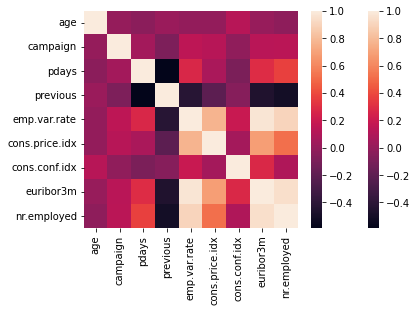

In [ ]:
# See Pearsons correlations between columns in a heatmap. Drop target
# Saving first heatmap
import seaborn as sns
corr = campaign.drop(columns='y').corr()

heatmap1 = sns.heatmap(corr).get_figure()
sns.heatmap(corr)

In [ ]:
campaign['emp.var.rate'].unique()

array([ 1.1,  1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3. , -1.7, -1.1])

In [ ]:
campaign['cons.price.idx'].unique()

array([93.994, 94.465, 93.918, 93.444, 93.798, 93.2  , 92.756, 92.843,
       93.075, 92.893, 92.963, 92.469, 92.201, 92.379, 92.431, 92.649,
       92.713, 93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199,
       94.601, 94.767])

In [ ]:
campaign['cons.conf.idx'].unique()

array([-36.4, -41.8, -42.7, -36.1, -40.4, -42. , -45.9, -50. , -47.1,
       -46.2, -40.8, -33.6, -31.4, -29.8, -26.9, -30.1, -33. , -34.8,
       -34.6, -40. , -39.8, -40.3, -38.3, -37.5, -49.5, -50.8])

In [ ]:
campaign.pdays.unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [ ]:
# change y to a numeric code using a dictionary and map
target_numeric = {'yes' : 1,
                  'no': 0}
campaign.y = campaign.y.map(target_numeric)
campaign.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0   may         mon         1    999         0  nonexistent           1.1   
1   may         mon         1    999         0  nonexistent           1.1   
2   may         mon         1    999         0  nonexistent           1.1   
3   may         mon         1    999         0  nonexistent           1.1   
4   may         mon         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.857       5191.0  0  
1          93.994          -36.4      4.857       5191.0  0  
2          93.994          -36.4      4.857       5191.0  0  
3          93.994          -36.4      4.857       5191.0  0  
4          93.994          -36.4      4.857       5191.0  0

In [ ]:
campaign.y.unique()

array([0, 1])

In [ ]:
# variables names with points are not friendly change them with rename
campaign.rename(columns =  {'emp.var.rate' : 'emp_var_rate',
                   'cons.price.idx': 'cons_price_idx',
                   'cons.conf.idx' : 'cons_conf_idx',
                   'nr.employed': 'nr_employed'},
                   inplace = True)

In [ ]:
campaign.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  campaign  pdays  previous     poutcome  emp_var_rate  \
0   may         mon         1    999         0  nonexistent           1.1   
1   may         mon         1    999         0  nonexistent           1.1   
2   may         mon         1    999         0  nonexistent           1.1   
3   may         mon         1    999         0  nonexistent           1.1   
4   may         mon         1    999         0  nonexistent           1.1   

   cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0          93.994          -36.4      4.857       5191.0  0  
1          93.994          -36.4      4.857       5191.0  0  
2          93.994          -36.4      4.857       5191.0  0  
3          93.994          -36.4      4.857       5191.0  0  
4          93.994          -36.4      4.857       5191.0  0

In [ ]:
campaign.nr_employed.unique()

array([5191. , 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5,
       5008.7, 4991.6, 4963.6])

In [ ]:
# Things to consider:
# Number of employee can be relevant to the model? look latter at feature importances
# Number of times was contacted is relevant? the same as before
# Age can be categorical to improve the model? Try the 2 ways and compare.
# pdays can be categoricaøl also to avoid the 999 number? like: 999 = not contacted and then categories like 1 to 4, 5 to 10 and so on.

In [ ]:
#start the modeling here first approach with data as it is. 
# get dummies of the categorical values
clean_data = pd.get_dummies(campaign, columns = ['job', 'marital','education','default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome'], drop_first = True)
clean_data

age  campaign  pdays  previous  emp_var_rate  cons_price_idx  \
0       56         1    999         0           1.1          93.994   
1       57         1    999         0           1.1          93.994   
2       37         1    999         0           1.1          93.994   
3       40         1    999         0           1.1          93.994   
4       56         1    999         0           1.1          93.994   
...    ...       ...    ...       ...           ...             ...   
41183   73         1    999         0          -1.1          94.767   
41184   46         1    999         0          -1.1          94.767   
41185   56         2    999         0          -1.1          94.767   
41186   44         1    999         0          -1.1          94.767   
41187   74         3    999         1          -1.1          94.767   

       cons_conf_idx  euribor3m  nr_employed  y  ...  month_may  month_nov  \
0              -36.4      4.857       5191.0  0  ...          1          0   
1              -36.4      4.857       5191.0  0  ...          1          0   
2              -36.4      4.857       5191.0  0  ...          1          0   
3              -36.4      4.857       5191.0  0  ...          1          0   
4              -36.4      4.857       5191.0  0  ...          1          0   
...              ...        ...          ... ..  ...        ...        ...   
41183          -50.8      1.028       4963.6  1  ...          0          1   
41184          -50.8      1.028       4963.6  0  ...          0          1   
41185          -50.8      1.028       4963.6  0  ...          0          1   
41186          -50.8      1.028       4963.6  1  ...          0          1   
41187          -50.8      1.028       4963.6  0  ...          0          1   

       month_oct  month_sep  day_of_week_mon  day_of_week_thu  \
0              0          0                1                0   
1              0          0                1                0   
2              0          0                1                0   
3              0          0                1                0   
4              0          0                1                0   
...          ...        ...              ...              ...   
41183          0          0                0                0   
41184          0          0                0                0   
41185          0          0                0                0   
41186          0          0                0                0   
41187          0          0                0                0   

       day_of_week_tue  day_of_week_wed  poutcome_nonexistent  \
0                    0                0                     1   
1                    0                0                     1   
2                    0                0                     1   
3                    0                0                     1   
4                    0                0                     1   
...                ...              ...                   ...   
41183                0                0                     1   
41184                0                0                     1   
41185                0                0                     1   
41186                0                0                     1   
41187                0                0                     0   

       poutcome_success  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
41183                 0  
41184                 0  
41185                 0  
41186                 0  
41187                 0  

[41188 rows x 53 columns]

In [ ]:
campaign.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp_var_rate    41188 non-null  float64
 15  cons_price_idx  41188 non-null  float64
 16  cons_conf_idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [ ]:
# just getting the library, not using it yet
from imblearn.over_sampling import RandomOverSampler
# https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html


# Let's over sample the minority class, which samples with replacement until the
# majority (died) and the minority (survived) are equal
ro = RandomOverSampler()

# Decide which features to use


X = clean_data.drop(['y'], axis = 1)
y = clean_data['y']

# Oversample, note that we oversample X and y at the same time in order to 
# make sure our features and targets stay synched.
#X_new, y_new = ro.fit_resample(X, y)

# Convert this to a dataframe and check the counts, now they're equal, because
# we have a bunch of duplicate 
#target = pd.DataFrame(y_new)


In [ ]:
# Run the first clasifier
from sklearn.tree import DecisionTreeClassifier
## Create Decision Tree classifer object with entropy criteria. Train Decision Tree Classifer. Not tunned yet.
clf = DecisionTreeClassifier(criterion="entropy", max_depth=500).fit(X_train, y_train)


In [ ]:
#Predict the response for test dataset with Decission tree
# This report include just columns selected for correlation grade.
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     10965
           1       0.33      0.34      0.34      1392

    accuracy                           0.85     12357
   macro avg       0.62      0.63      0.62     12357
weighted avg       0.85      0.85      0.85     12357



In [ ]:
clean_data.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [ ]:
# See importance of each variable in the model Desission tree
# Features importances in a model this block can be run with diferent models to compare
feat_imports = (pd.DataFrame({"feature names": X_train.columns,
                              "importances": clf.feature_importances_})
                .sort_values("importances", ascending=False))

feat_imports


feature names  importances
0                             age     0.196184
8                     nr_employed     0.153962
7                       euribor3m     0.095632
1                        campaign     0.076207
33                    housing_yes     0.042493
6                   cons_conf_idx     0.028942
2                           pdays     0.026205
35                       loan_yes     0.024083
20                marital_married     0.021796
30                default_unknown     0.019093
25          education_high.school     0.018374
28    education_university.degree     0.018164
17                 job_technician     0.018021
46                day_of_week_mon     0.016598
9                 job_blue-collar     0.016472
49                day_of_week_wed     0.015649
47                day_of_week_thu     0.015641
21                 marital_single     0.015080
48                day_of_week_tue     0.013773
3                        previous     0.013184
12                 job_management     0.012687
27  education_professional.course     0.012563
24             education_basic.9y     0.012275
15                   job_services     0.011567
14              job_self-employed     0.010723
5                  cons_price_idx     0.010519
29              education_unknown     0.010302
23             education_basic.6y     0.009372
36              contact_telephone     0.009079
10               job_entrepreneur     0.006163
44                      month_oct     0.005348
18                 job_unemployed     0.005216
50           poutcome_nonexistent     0.005071
16                    job_student     0.004798
13                    job_retired     0.004042
11                  job_housemaid     0.003632
32                housing_unknown     0.003419
37                      month_aug     0.002746
4                    emp_var_rate     0.002642
19                    job_unknown     0.002619
39                      month_jul     0.002452
51               poutcome_success     0.001826
34                   loan_unknown     0.001581
40                      month_jun     0.001176
22                marital_unknown     0.000715
43                      month_nov     0.000482
42                      month_may     0.000428
45                      month_sep     0.000423
41                      month_mar     0.000294
26           education_illiterate     0.000284
38                      month_dec     0.000000
31                    default_yes     0.000000

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


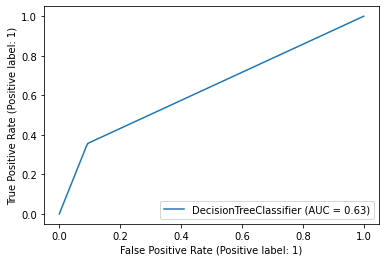

In [ ]:
# running the roc and getting the area under the curve for a model
from sklearn import metrics as sm
sm.plot_roc_curve(clf, X_test, y_test)

In [ ]:
#import random forest clasifier
# start spliting the data for the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.30)

In [ ]:
# using random forest model, prdiction may vary in each run of the model, not tunned yet.

rclf = RandomForestClassifier( n_estimators= 60
                              , max_leaf_nodes=3, n_jobs=-1).fit(X_train, y_train)

y_pred = rclf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10965
           1       0.68      0.01      0.03      1392

    accuracy                           0.89     12357
   macro avg       0.78      0.51      0.48     12357
weighted avg       0.86      0.89      0.84     12357



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


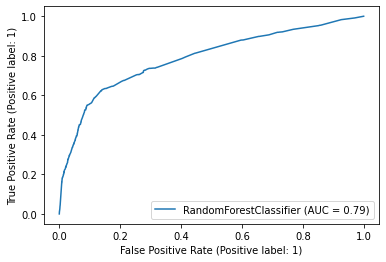

In [ ]:
sm.plot_roc_curve(rclf, X_test, y_test)